In this homework, we will look at how python can be used to analyze data using the pandas data analysis package, and how we can model data using probability distributions studied in class.

We will be using a data file which has been extracted from the Iris Flower Data Set, which is perhaps the best known database to be found in the pattern recognition literature. The original dataset consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For more information, please see the following page at the UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/iris

In this problem, we will be working with a smaller dataset, which consideres only two types of irises: versicolor and virginica, and two random variables: petal width and sepal width.

Download the file "iriswidth.xlsx" from the course website to complete the homework. 

We recommend you use the pandas package, numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous homeworks.

For more information about pandas, please see https://pandas.pydata.org/ 

After you have completed the notebook, export it as pdf for submission. You can do this in one of two ways:
1. Go to File, click Download as, click PDF via LaTeX (.pdf).
2. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load all the packages we need for this homework.

In [619]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

Below, we load the datafile using **pandas.read_excel** function into a a **pandas.DataFrame**. 

Visualize the joint behavior of two random variables by plotting a 2D scatter plot of petal width and sepal width.

We plot the 2D scatter plots using ax.scatter. Set the limits of the axis in both plots using the axis( ) command to axlim defined below to enable easy comparison.

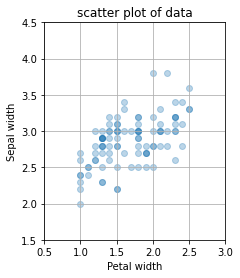

In [620]:
# read data
data = pd.read_excel('iriswidth.xlsx',index_col = 'Index')

# create figure
fig, ax = plt.subplots()

# create scatter plot
ax.scatter(data['Petal width'], data['Sepal width'], alpha=0.3)

# set axes and labels
ax.axis('scaled')
axlim = [0.5, 3, 1.5, 4.5]
ax.axis(axlim)
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.grid(True)
ax.set_title('scatter plot of data')

plt.show()

We start by modelling the joint distribution of petal and sepal width using a 2D Gaussian distribution $f_{X,Y}(x,y)$ with mean vector $m$ and covariance matrix $C$. 

The code below estimates the mean and covariance that best fit the data using the **pandas.DataFrame.mean** and **pandas.DataFrame.cov** functions

In [621]:
# Compute the mean vector and covariance matrix
m = data.mean()
C = data.cov()
rho = data.corr(method = 'pearson')

print('The mean vector of petal width and sepal width is\n')
print(m)

print('\nThe covariance matrix of petal width and sepal width is\n')
print(C)

print('\nThe correlation coefficient matrix of petal width and sepal width is\n')
print(rho)

The mean vector of petal width and sepal width is

Petal width    1.676
Sepal width    2.872
dtype: float64

The covariance matrix of petal width and sepal width is

             Petal width  Sepal width
Petal width     0.180428     0.080028
Sepal width     0.080028     0.110723

The correlation coefficient matrix of petal width and sepal width is

             Petal width  Sepal width
Petal width     1.000000     0.566203
Sepal width     0.566203     1.000000


 The code below overlays a contour plot of the 2D Gaussian that best fits the data onto the scatterplot. 

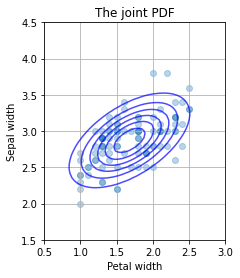

In [622]:
# create a multivariate Gaussian random variable with mean m and covariance matrix C
dist = multivariate_normal(m, C)

# create limits of plot
axlim = [0.5, 3, 1.5, 4.5]

# create set of (x,y) positions to compute the pdf at
x, y = np.meshgrid( np.linspace(axlim[0], axlim[1]), np.linspace(axlim[2], axlim[3]) )
pos = np.dstack((x, y))

# compute the joint Gaussian pdf
f_XY = dist.pdf(pos)

# create the plot
fig, ax = plt.subplots()

# scatter plot
ax.scatter(data['Petal width'], data['Sepal width'], alpha=0.3)

# pdf contour plot
ax.contour(x, y, f_XY, colors='b', alpha = 0.7)

# set axes and labels
ax.axis('scaled')
ax.axis(axlim)
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.grid(True)
ax.set_title('The joint PDF')

plt.show()

Now, we generate the scatter plot of petal widh and sepal width for each species separately. We separate data into different groups using the **pandas.DataFrame.groupby** command.

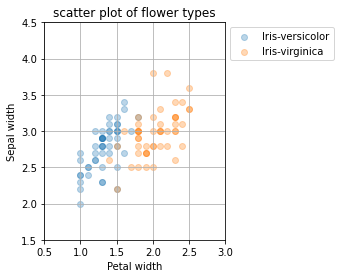

In [623]:
# create figure
fig, ax = plt.subplots()

# create one scatter plot for each flower type
for name, groups in data.groupby('Class'):
    ax.scatter(x='Petal width', y='Sepal width', data = groups, label = name, alpha = 0.3)

# set axes and labels
ax.axis('scaled')
ax.axis(axlim)
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.grid(True)
plt.title('scatter plot of flower types')

plt.show()

From the scatter plot above, you may notice that one species of iris flowers has a stronger correlation between sepal and petal width. YOu may also note that the mean values and spreads (variances) are different.

**Part a:** Compute the mean vectors, covariance matrices and correlation coefficient matrices of petal width and sepal width for each species.

In [624]:
# put your code here
m1=data.groupby('Class')['Petal width'].mean()
m2=data.groupby('Class')['Sepal width'].mean()
m3=data.groupby('Class').mean()
print(f'{m1},{m2}')
print(m3)

Class
Iris-versicolor    1.326
Iris-virginica     2.026
Name: Petal width, dtype: float64,Class
Iris-versicolor    2.770
Iris-virginica     2.974
Name: Sepal width, dtype: float64
                 Petal width  Sepal width
Class                                    
Iris-versicolor        1.326        2.770
Iris-virginica         2.026        2.974


In [625]:
groups=data.groupby('Class')
rho1 = groups.corr(method = 'pearson')
print(rho1)

                             Petal width  Sepal width
Class                                                
Iris-versicolor Petal width     1.000000     0.663999
                Sepal width     0.663999     1.000000
Iris-virginica  Petal width     1.000000     0.537728
                Sepal width     0.537728     1.000000


In [626]:
groups=data.groupby('Class')

C1=groups.cov()

print(f'{C1}')

                             Petal width  Sepal width
Class                                                
Iris-versicolor Petal width     0.039106     0.041204
                Sepal width     0.041204     0.098469
Iris-virginica  Petal width     0.075433     0.047629
                Sepal width     0.047629     0.104004


**Part b:** Based on the results in **Part a** and the scatter plots for each species, answer the following questions:

(1) On average, which species of iris flowers has narrower petals?

(2) Which species of iris flowers shows greater variation in sepal width?

(3) Which species of iris flowers has a larger correlation coefficient between the petal width and sepal width?

**Part b answer:**
1) Iris-versicolor has narrower petal width.
2) Iris_versicolor shows greater variation in sepal width.
3) Iris_virginica has a larger correlation coefficient.

**Part c:** Assume that the conditional joint probability density functions of petal width $P$ and sepal width $S$ given the species $C$, $f_{P, W|C}(x,y|c)$ for $c \in \{ \mathrm{versicolor}, \mathrm{virginica} \}$, are given by Gaussian distributions with mean vectors and covariance matrices computed in **Part a**, respectively.

Overlay scatter plots of petal width and sepal width with contour diagrams of the joint densities for both species in the same figure.

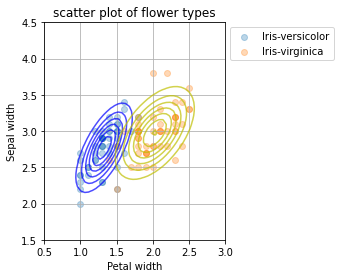

In [627]:
# put your code here
groups = data.groupby('Class')
m3=groups['Petal width'].mean()
m4=groups['Sepal width'].mean()
m5=[m3['Iris-versicolor'],m4['Iris-versicolor']]
c2=C1[0:2]
m6=[m3['Iris-virginica'],m4['Iris-virginica']]
c3=C1[2:4]

dist = multivariate_normal(m5,c2)

# create limits of plot
axlim = [0.5, 3, 1.5, 4.5]

# create set of (x,y) positions to compute the pdf at
x, y = np.meshgrid( np.linspace(axlim[0], axlim[1]), np.linspace(axlim[2], axlim[3]) )
pos = np.dstack((x, y))

# compute the joint Gaussian pdf
f_XY = dist.pdf(pos)


dist = multivariate_normal(m6,c3)

# create limits of plot
axlim = [0.5, 3, 1.5, 4.5]

# create set of (x,y) positions to compute the pdf at
x1, y1 = np.meshgrid( np.linspace(axlim[0], axlim[1]), np.linspace(axlim[2], axlim[3]) )
pos = np.dstack((x1, y1))

# compute the joint Gaussian pdf
f_XY1 = dist.pdf(pos)

fig, ax = plt.subplots()
ax.contour(x, y, f_XY, colors='b', alpha = 0.7)
ax.contour(x1, y1,f_XY1 ,colors='y', alpha = 0.7)


# create one scatter plot for each flower type
for name, groups in data.groupby('Class'):
    ax.scatter(x='Petal width', y='Sepal width', data = groups, label = name, alpha = 0.3)
    
# set axes and labels
ax.axis('scaled')
ax.axis(axlim)
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.grid(True)
plt.title('scatter plot of flower types')

plt.show()

### Pattern classification

A simple classifier classifies flowers as virginica if the petal width $P$ is greater threshold $T$, and as versicolor otherwise. 

The probability that this classifier makes an error is given by

$
\mathrm{P}[\mathrm{versicolor\ and\ } P>T] + \mathrm{P}[\mathrm{virginica \ and \ } P \leq T] 
= \mathrm{P} [ P > T | \mathrm{versicolor} ] \mathrm{P} [ \mathrm{versicolor} ] 
+ \mathrm{P} [ P \leq T | \mathrm{virginica} ] \mathrm{P} [ \mathrm{virginica} ]
$

Below, we plot the probability that this classifier makes an error for $t$ from 0 to 3.0 under the following assumtions:

1. The conditional probability density functions of petal width given species, $f_{P | C } (p | c ) $, 
are given by Gaussian distributions

2. The prior probabilities of the two species are equal, i.e. 
$\mathrm{P} [ \mathrm{versicolor} ] = \mathrm{P} [ \mathrm{virginica} ] = 0.5$

We calculate the probabilities that $P > T$ and $P \leq T$ using the survival functions and the cumulative distribution functions.


The plot shows that there is an optimal threshold at $T = 1.6$. The corresponding probability of making an error is 0.07.

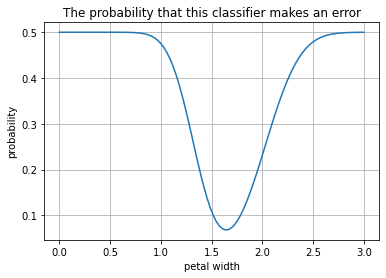

The minmum probability that this classifier makes an error is 0.06813476813699997
The optimum threshold is 1.6363636363636365


In [628]:
groups = data.groupby('Class')
m_pw_by_species = groups['Petal width'].mean()
s_pw_by_species = groups['Petal width'].std()

t = np.linspace(0, 3, 100)

p_pw_e_versicolor = scipy.stats.norm.sf(t, loc = m_pw_by_species['Iris-versicolor'], scale = s_pw_by_species['Iris-versicolor'])
p_pw_e_virginica = scipy.stats.norm.cdf(t, loc = m_pw_by_species['Iris-virginica'], scale = s_pw_by_species['Iris-virginica'])
p_pw_e = p_pw_e_versicolor*0.5 + p_pw_e_virginica*0.5

fig = plt.figure()
plt.plot(t, p_pw_e)
plt.title('The probability that this classifier makes an error')
plt.xlabel('petal width')
plt.ylabel('probability')
plt.grid()
plt.show()

print(f'The minmum probability that this classifier makes an error is {min(p_pw_e)}')
print(f'The optimum threshold is {t[np.argmin(p_pw_e)]}')

Intuitively, we should be able to get better classificaiton peformance if we use more information. 

For example, we can consider the difference, $D = 2*P-S$, where $P$ is the petal width and $S$ is the sepal width.

**Part d:** Compute the mean and variance of $D$ for each species.

In [629]:
# put your code here
p=groups['Petal width'].mean()
s=groups['Sepal width'].mean()
E_d=2*p-s
pp=groups['Petal width'].var()
sp=groups['Sepal width'].var()
#print(pp)
#print(sp)
co=groups.cov()
Var_d=4*pp+sp
print(E_d)
print(Var_d)

Class
Iris-versicolor   -0.118
Iris-virginica     1.078
dtype: float64
Class
Iris-versicolor    0.254894
Iris-virginica     0.405735
dtype: float64


**Part e:** 

Consider a classifier that classifies flowers as virginica if $D = 2*P - S$ is greater threshold $T$. 

Plot the probability that this classifier makes an error for $T$ from -2.0 to 3.0 under the assumption that the conditional joint probability density functions of petal width $P$ and sepal width $S$ given the species $C$, $f_{P, W|C}(x,y|c)$ for $c \in \{ \mathrm{versicolor}, \mathrm{virginica} \}$, are given by Gaussian distributions with mean vectors and covariance matrices computed in **Part a**

Find the optimal vaue of $T$ and the correspoding probability that this classifier makes an error.

Is the probability of making an error less than that when we only looked at one feature alone?

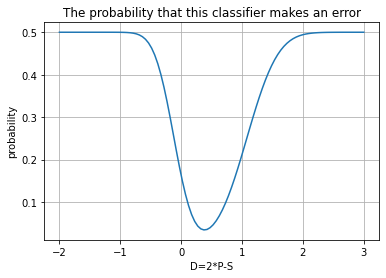

The minmum probability that this classifier makes an error is 0.034078054949446525
The optimum threshold is 0.3737373737373737


In [630]:
# put your code here
t = np.linspace(-2, 3, 100)

p_pw_e_versicolor = scipy.stats.norm.sf(t, loc = E_d['Iris-versicolor'], scale = Var_d['Iris-versicolor'])
p_pw_e_virginica = scipy.stats.norm.cdf(t, loc = E_d['Iris-virginica'], scale = Var_d['Iris-virginica'])
p_pw_e = p_pw_e_versicolor*0.5 + p_pw_e_virginica*0.5

fig = plt.figure()
plt.plot(t, p_pw_e)
plt.title('The probability that this classifier makes an error')
plt.xlabel('D=2*P-S')
plt.ylabel('probability')
plt.grid()
plt.show()

print(f'The minmum probability that this classifier makes an error is {min(p_pw_e)}')
print(f'The optimum threshold is {t[np.argmin(p_pw_e)]}')


**Part e answer:** Yes